# CNN Deep Learning Classifier with Tensorflow and Keras
Create Databricks libraries for the following:
* tensorflow
* keras

In [2]:
import tensorflow
print (tensorflow.__version__)

from keras import backend as K

1.12.0
Using TensorFlow backend.

In [3]:
# Helper function
def load_data (folder):
    # iterate through folders, assembling feature, label, and classname data objects
    import os
    import numpy as np
    import matplotlib.pyplot as plt

    c = 0
    features = []
    labels = np.array([])
    classnames = []
    for root, dirs, filenames in os.walk(folder):
        for d in dirs:
            # use the folder name as the class name for this label
            classnames.append(d)
            files = os.listdir(os.path.join(root,d))
            for f in files:
                imgFile = os.path.join(root,d, f)
                img = plt.imread(imgFile)
                features.append(img)
                labels = np.append(labels, c)
            c = c + 1
    features = np.array(features)
    
    return features, labels, classnames

In [4]:
# Prepare the image data
features, labels, classnames = load_data('/dbfs/resized_images')
features.shape

Out[ 4 ]: (2122, 128, 128, 3)

In [5]:
from keras.utils import np_utils
from sklearn.model_selection import train_test_split


# split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.30)

#Format features
x_train = x_train.astype('float32')
x_train /= 255
x_test = x_test.astype('float32')
x_test /= 255

# Format labels
y_train = np_utils.to_categorical(y_train, len(classnames))
y_train = y_train.astype('float32')
y_test = np_utils.to_categorical(y_test, len(classnames))
y_test = y_test.astype('float32')

In [6]:
# Train a CNN classifier
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.utils import to_categorical

model = Sequential()
model.add(Conv2D(32, (6, 6), input_shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (6, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(32, (6, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(len(classnames), activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
num_epochs = 20
history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=64, validation_data=(x_test, y_test))

Train on 1485 samples, validate on 637 samples
Epoch 1/20

 64/1485 [>.............................] - ETA: 33s - loss: 2.5348 - acc: 0.1250
 128/1485 [=>............................] - ETA: 28s - loss: 2.4091 - acc: 0.1484
 192/1485 [==>...........................] - ETA: 26s - loss: 2.3997 - acc: 0.1875
 256/1485 [====>.........................] - ETA: 24s - loss: 2.3712 - acc: 0.1914
 320/1485 [=====>........................] - ETA: 22s - loss: 2.3902 - acc: 0.1844
 384/1485 [======>.......................] - ETA: 21s - loss: 2.3771 - acc: 0.1953
 448/1485 [========>.....................] - ETA: 19s - loss: 2.3591 - acc: 0.2076
 512/1485 [=========>....................] - ETA: 18s - loss: 2.3390 - acc: 0.2266
 576/1485 [==========>...................] - ETA: 17s - loss: 2.3399 - acc: 0.2240
 640/1485 [===========>..................] - ETA: 16s - loss: 2.3124 - acc: 0.2422
 704/1485 [=============>................] - ETA: 14s - loss: 2.3090 - acc: 0.2415
 768/1485 [==============>...............] - ETA: 13s - loss: 2.3072 - acc: 0.2370
 832/1485 [===============>..............] - ETA: 12s - loss: 2.3023 - acc: 0.2416
 896/1485 [=================>............] - ETA: 11s - loss: 2.3006 - acc: 0.2366
 960/1485 [==================>...........] - ETA: 9s - loss: 2.2871 - acc: 0.2417 
1024/1485 [===================>..........] - ETA: 8s - loss: 2.2759 - acc: 0.2471
1088/1485 [====================>.........] - ETA: 7s - loss: 2.2626 - acc: 0.2454
1152/1485 [======================>.......] - ETA: 6s - loss: 2.2613 - acc: 0.2465
1216/1485 [=======================>......] - ETA: 4s - loss: 2.2432 - acc: 0.2541
1280/1485 [========================>.....] - ETA: 3s - loss: 2.2269 - acc: 0.2609
1344/1485 [==========================>...] - ETA: 2s - loss: 2.2014 - acc: 0.2708
1408/1485 [===========================>..] - ETA: 1s - loss: 2.1788 - acc: 0.2784
1472/1485 [============================>.] - ETA: 0s - loss: 2.1568 - acc: 0.2874
1485/1485 [==============================] - 30s 20ms/step - loss: 2.1535 - acc: 0.2882 - val_loss: 1.6101 - val_acc: 0.6044
Epoch 2/20

 64/1485 [>.............................] - ETA: 26s - loss: 1.5424 - acc: 0.5312
 128/1485 [=>............................] - ETA: 24s - loss: 1.7156 - acc: 0.5000
 192/1485 [==>...........................] - ETA: 24s - loss: 1.5760 - acc: 0.5208
 256/1485 [====>.........................] - ETA: 22s - loss: 1.5721 - acc: 0.5273
 320/1485 [=====>........................] - ETA: 21s - loss: 1.5288 - acc: 0.5437
 384/1485 [======>.......................] - ETA: 20s - loss: 1.4882 - acc: 0.5521
 448/1485 [========>.....................] - ETA: 19s - loss: 1.5216 - acc: 0.5290
 512/1485 [=========>....................] - ETA: 17s - loss: 1.5100 - acc: 0.5332
 576/1485 [==========>...................] - ETA: 16s - loss: 1.4438 - acc: 0.5556
 640/1485 [===========>..................] - ETA: 15s - loss: 1.4347 - acc: 0.5625
 704/1485 [=============>................] - ETA: 14s - loss: 1.4327 - acc: 0.5668
 768/1485 [==============>...............] - ETA: 13s - loss: 1.4175 - acc: 0.5729
 832/1485 [===============>..............] - ETA: 12s - loss: 1.4088 - acc: 0.5697
 896/1485 [=================>............] - ETA: 10s - loss: 1.4007 - acc: 0.5770
 960/1485 [==================>...........] - ETA: 9s - loss: 1.3889 - acc: 0.5781 
1024/1485 [===================>..........] - ETA: 8s - loss: 1.3841 - acc: 0.5820
1088/1485 [====================>.........] - ETA: 7s - loss: 1.3787 - acc: 0.5818
1152/1485 [======================>.......] - ETA: 6s - loss: 1.3569 - acc: 0.5885
1216/1485 [=======================>......] - ETA: 4s - loss: 1.3383 - acc: 0.5970
1280/1485 [========================>.....] - ETA: 3s - loss: 1.3187 - acc: 0.6031
1344/1485 [==========================>...] - ETA: 2s - loss: 1.3181 - acc: 0.5997
1408/1485 [===========================>..] - ETA: 1s - loss: 1.3126 - acc: 0.6016
1472/1485 [============================>.] - ETA: 0s - loss: 1.3068 - acc: 0.6026
1485

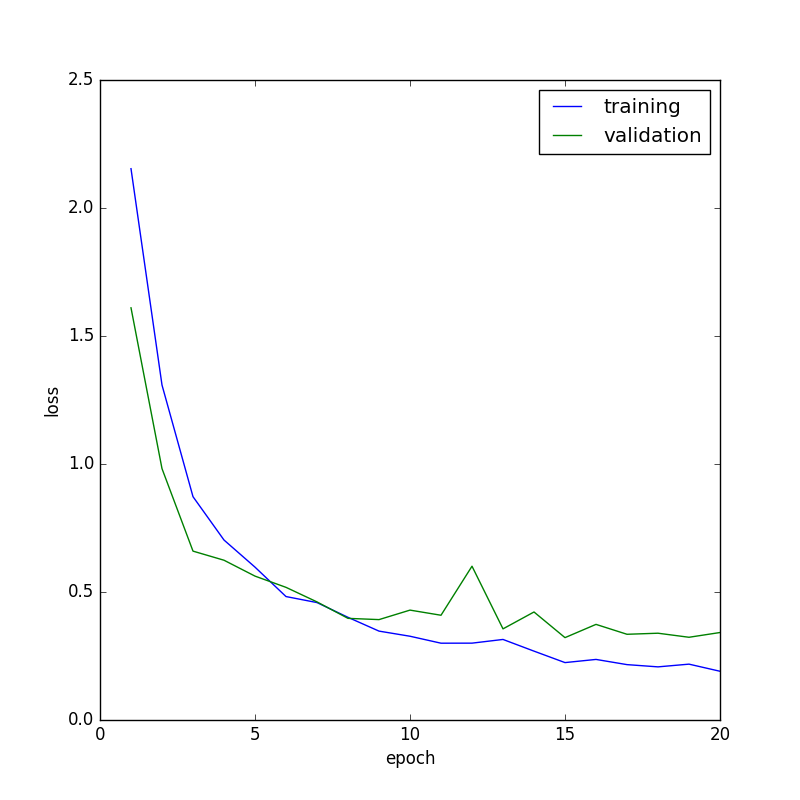

In [7]:
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]

fig = plt.figure(figsize=(8, 8))
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

display(fig)

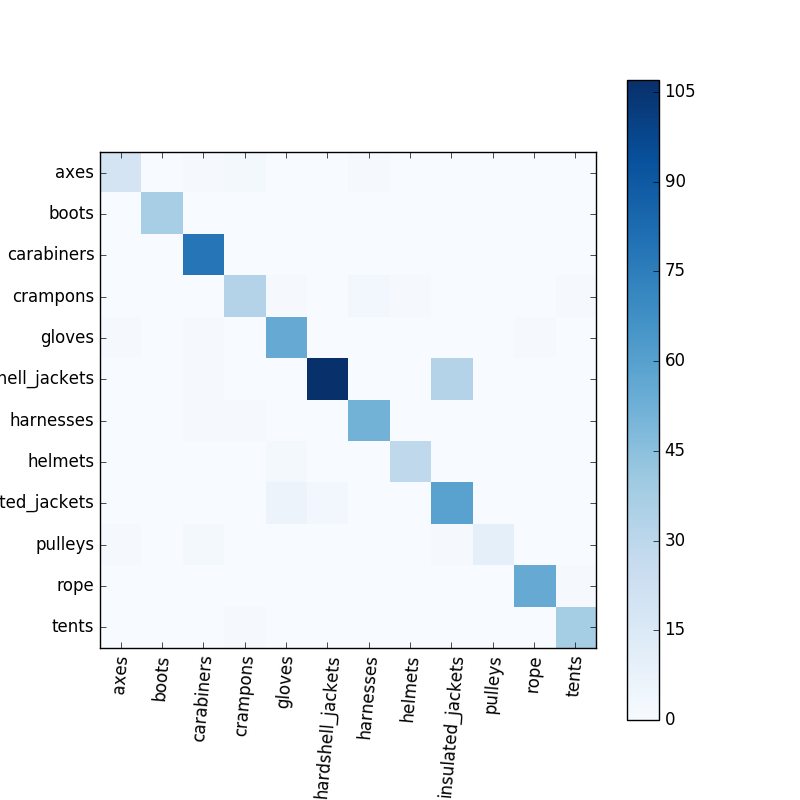

In [8]:
#Keras doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


class_probabilities = model.predict(x_test)
predictions = np.argmax(class_probabilities, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
fig = plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classnames))
plt.xticks(tick_marks, classnames, rotation=85)
plt.yticks(tick_marks, classnames)
plt.xlabel("Predicted Shape")
plt.ylabel("True Shape")
plt.show()
display(fig)

In [9]:
def predict_image(classifier, img):
    import numpy as np
    
    # Flatten the image data to correct feature format
    imgfeatures = img.reshape(1, img.shape[0], img.shape[1], img.shape[2])
    imgfeatures = imgfeatures.astype('float32')
    imgfeatures /= 255

    # Use the classifier to predict the class
    predicted_class = classifier.predict(imgfeatures)
    i = np.argmax(predicted_class, axis=1)
    return i

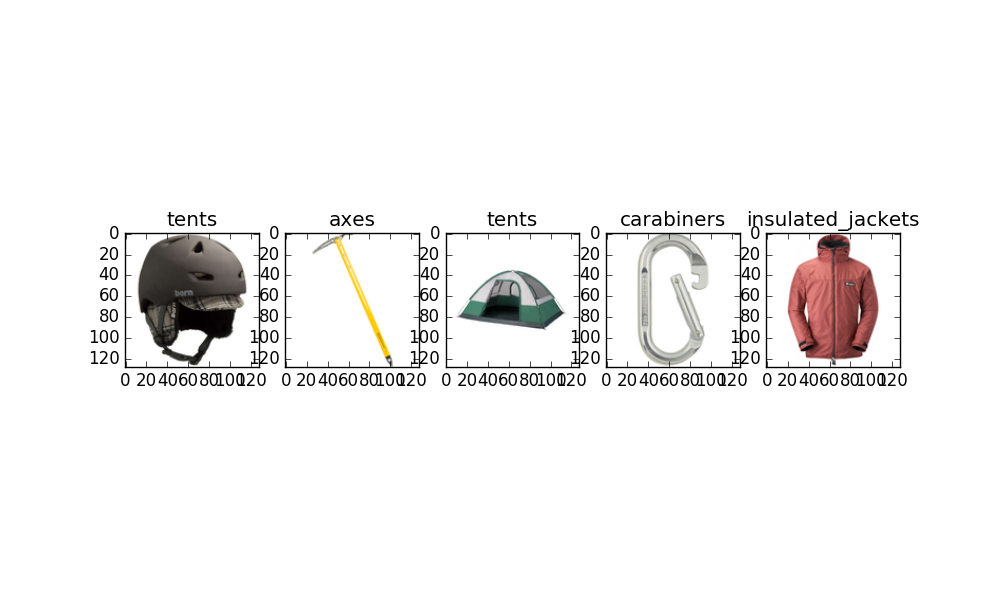

In [10]:
# Resize image
def resize_image(img, size):
    from PIL import Image, ImageOps 
    
    # Convert RGBA images to RGB
    if np.array(img).shape[2] == 4:
        img = img.convert('RGB')
        
    # resize the image
    img.thumbnail(size, Image.ANTIALIAS)
    newimg = Image.new("RGB", size, (255, 255, 255))
    newimg.paste(img, (int((size[0] - img.size[0]) / 2), int((size[1] - img.size[1]) / 2)))
    
    return newimg

# Predict class for new data
from PIL import Image, ImageOps
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

image_urls = []
image_urls.append('https://i.stack.imgur.com/5I4Rx.jpg')
image_urls.append('https://i.stack.imgur.com/HeliW.jpg')
image_urls.append('https://productimages.camping-gear-outlet.com/e5/62379.jpg')
image_urls.append('http://s7d1.scene7.com/is/image/MoosejawMB/MIKAJMKFMKCAPNABx1024698_zm?$product1000$')
image_urls.append('http://www.buffalosystems.co.uk/wp-content/uploads/2012/06/zoom_apline_jacket_dark_russet-2365x3286.jpg')

size = (128,128)

fig = plt.figure(figsize=(10, 6))

# Get the images and show the predicted classes
for url_idx in range(len(image_urls)):
    response = requests.get(image_urls[url_idx])
    img = Image.open(BytesIO(response.content))
    #pre-process the image so it matches the training set
    img = np.array(resize_image(img, size))
    class_idx = predict_image(model, img)
    class_name = classnames[class_idx[0]]
    a=fig.add_subplot(1,len(image_urls),url_idx+1)
    imgplot = plt.imshow(img)
    a.set_title(class_name)
    
display(fig)